## KPCA

In [1]:
"""
Author:     Rajkumar Conjeevaram Mohan
University: Imperial College London
Email:      rajkumarcm@yahoo.com
Program:    Data compression using
            Kernel Principal Component Analysis
Date:       March 19, 2021
"""

import numpy as np
from data import load_data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

def rbf(pairwise_distance,gamma):
    """
    Radial Basis Function Kernel
    :param pairwise_distance: euclidean pairwise distance matrix
    :param gamma: Free parameter of RBF kernel
    :return: Kernel of same shape as input distance matrix
    """
    return np.exp(-gamma*(pairwise_distance))

def pairwise_distance_matrix(X, Y):
    """
    Computes pairwise euclidean distance matrix faster at the cost of
    memory.
    :param X: Data between which distance needs to be computed [N,D]
    :param Y: Data between which distance needs to be computed [M,D]
    :return: Pairwise distance matrix of shape [N,M]
    """

    N, D = X.shape
    M, _ = Y.shape

    """---------------------------------------------------------
    Fast method
    ---------------------------------------------------------"""
    X_new = np.repeat(X,M,axis=0)
    Y_new = np.tile(Y,(N,1))

    temp = X_new - Y_new
    distance_matrix = np.sqrt(np.diag((np.dot(temp,temp.T))))
    distance_matrix = np.reshape(distance_matrix,[N,M])
    return distance_matrix

def kpca(X=None,kernel=rbf,retain_dims=1):
    """
    Kernel Principal Component Analysis
    :param X: Training data must be of shape [samples,features]
    :param kernel: Kernel functions ( RBF, Polynomial, etc. )
    :param retain_dims: Dimension of latent space
    :return: Non-linear principal components that lives linearly in
             high dimensional space
    """

    if X is None:
        X,_ = data.load_data("Iris/iris.data","\n",",",target_col=4,numeric_target=False)

    N,M = X.shape

    # First construct the E matrix, which is 1/N and of shape NxN
    E = np.ones([N,N],dtype=np.float32) * 1/N
    I = np.eye(N,N)

    # Second compute the kernel
    K = pairwise_distance_matrix(X,X)
    K = kernel(K,15)


    # Then compute the centralised kernel
    K_c = np.dot((I-E),np.dot(K,(I-E)))

    # Once positive semi-definite matrix is computed,
    # eigen analysis can then be done
    S,V = np.linalg.eig(K_c)
    S = np.abs(S.real)
    V = V.real

    # Sort the eigen vectors by the variance
    indices = np.argsort(S)[::-1][:retain_dims]
    S = np.diag(S[indices])
    V = V[:,indices]

    return V,S

def project_data(X,B,V,S,kernel=rbf):
    """

    :param X: Training data must be of shape [samples,features]
    :param B: Data to be projected onto latent space. Should be of same shape as X
    :param V: Principal components returned kpca
    :param S: Eigenvalue (aka variance) returned by kpca
    :param kernel: Kernel functions ( RBF, Polynomial, etc. )
    :return: Data of shape [samples,reduced_dimension]
    """

    # Projecting data using kernel trick
    N = X.shape[0]
    E = np.ones([N, N], dtype=np.float) * 1 / N
    I = np.eye(N, N)
    G  = pairwise_distance_matrix(X,B)
    G = kernel(G,15)
    Y = np.linalg.inv(S) @ V.T @ (I - E) @ G[:,0]

    return Y

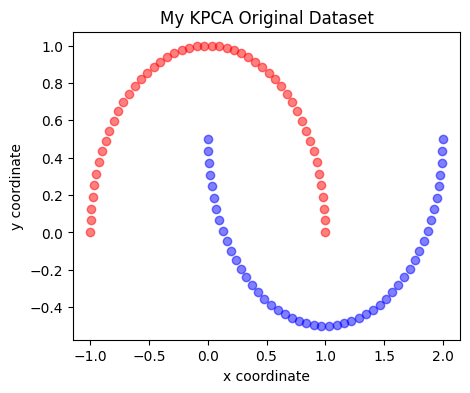

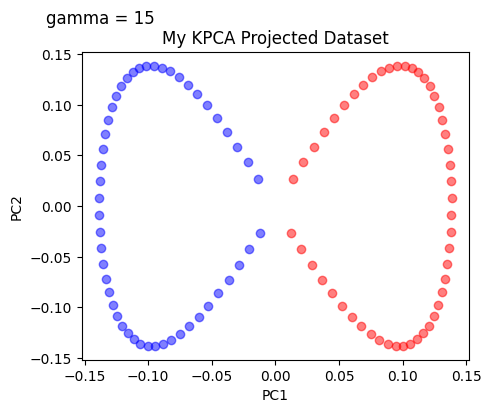

In [5]:
"""------------------------------------------------------------
DISCLAIMER: Plotting code was copied from 
https://sebastianraschka.com/Articles/2014_kernel_pca.html
for testing purposes
-------------------------------------------------------------"""

X, y = make_moons(n_samples=100, random_state=123)
X_pc,S = kpca(X=X,retain_dims=2)

"""----------------------------------------------------------------
Plot the original data
----------------------------------------------------------------"""
plt.figure(figsize=(5, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.5)

plt.title('My KPCA Original Dataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

"""----------------------------------------------------------------
Plot the projected data
----------------------------------------------------------------"""
plt.figure(figsize=(5, 4))
plt.scatter(X_pc[y == 0, 0], X_pc[y == 0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y == 1, 0], X_pc[y == 1, 1], color='blue', alpha=0.5)

plt.title('My KPCA Projected Dataset')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()